# Курсовая работа
Выполнил Никитин Павел Михайлович, БФИ2202
---

In [458]:
class HashTable:

    def __init__(self, size):
        self.size = size
        self.keys = [None for _ in range(self.size)]
        self.values = [None for _ in range(self.size)]
        self.hashFunc = lambda x: sum([ord(y) for y in str(x)]) % self.size
    
    def put(self, key, value):
        hashkey = self.hashFunc(key)
        if self.keys[hashkey] is None:
            self.keys[hashkey] = key
            self.values[hashkey] = value
        else:
            if self.keys[hashkey] == key:
                self.values[hashkey] = value
            else:
                p = 1
                while p < self.size and self.keys[(hashkey + p) % self.size] is not None and self.keys[(hashkey + p) % self.size] != key:
                    p += 1
                if p == self.size:
                    print("Хэш-таблица заполнена!")
                else:
                    self.keys[(hashkey + p) % self.size] = key
                    self.values[(hashkey + p) % self.size] = value
        
    def get(self, key):
        hashkey = self.hashFunc(key)
        if self.keys[hashkey] is None:
            return None
        if self.keys[hashkey] == key:
            return self.values[hashkey]
        p = 1
        while (p < self.size) and self.keys[(hashkey + p) % self.size] is not None and self.keys[(hashkey + p) % self.size] != key:
            p += 1
        if p == self.size:
            return None
        return self.values[(hashkey + p) % self.size]

## Считывание данных из CSV

In [459]:
from datetime import datetime

file = open("sells.csv")
orders = []
lines = file.readlines()
for i in range(len(lines)) :
    x = lines[i].split(';')
    if len(x) == 7:
        date = x[1]
        if len(date.split('.')) != 3 or any([not x.isdigit() for x in date.split('.')]):
            date = datetime.now().strftime('%d.%m.%Y')
        orders.append([int(x[0]), date, x[2], x[3], int(x[4]), int(x[5]), int(x[6])])
    else:
        print(f"Некорректные данные в строке {i + 1}")


Некорректные данные в строке 22
Некорректные данные в строке 30


In [460]:
orders

[[1, '14.05.2024', 'Укулеле сопрано С.С.С.Р.', 'Укулеле', 1, 4548, 4548],
 [2,
  '14.05.2024',
  'Портативный рекордер Zoom H1n',
  'Записывающие устройства',
  1,
  8000,
  8000],
 [3,
  '14.05.2024',
  'Струны нейлоновые AQUILA RED SERIES 89U',
  'Акксесуары укулеле',
  15,
  700,
  7500],
 [4,
  '14.05.2024',
  'MIDI-клавиатура AKAI PRO MPK249',
  'MIDI-клавиатура',
  2,
  54900,
  109800],
 [5,
  '15.05.2024',
  'Гитарный комбоусилитель Fender Mustang GT40',
  'Гитарные усилители',
  1,
  21000,
  21000],
 [6,
  '15.05.2024',
  'Электрогитара Gibson Les Paul Standard',
  'Электрогитары',
  1,
  110000,
  110000],
 [7,
  '15.05.2024',
  'Бас-гитара Fender Jazz Bass',
  'Бас-гитары',
  1,
  65000,
  65000],
 [8,
  '16.05.2024',
  'Педаль эффектов BOSS DS-1',
  'Гитарные педали',
  2,
  5800,
  11600],
 [9,
  '16.05.2024',
  'Стойка для гитары Hercules GS414B',
  'Стойки и подставки',
  3,
  3000,
  9000],
 [10,
  '16.05.2024',
  'Портативный рекордер Zoom H1n',
  'Записывающие устрой

Внесение данных в хеш-таблицу *товаров*

In [461]:
hash_goods = HashTable(len(orders) * 2)
for x in orders:
    gfinded = hash_goods.get(x[2]) # x[2] - название товара
    if gfinded is None:
        hash_goods.put(x[2], [x[3], x[4], x[5], x[6]]) # ключ - название товара, значения - категория кол-во цена стоимость
    else:
        hash_goods.put(x[2], [x[3], x[4] + gfinded[1], x[5], x[6] + gfinded[3]])

In [462]:
hash_goods.get("Орбизы")

## Расчёт общей выручки магазина

In [463]:
def total_income():
    res = 0
    for x in orders:
        res += int(x[6])
    return res

print(total_income())

1294472


## Найти товар, который был продан наибольшее число раз

In [464]:
def max_selled():
    maximum = orders[0][2]
    for x in hash_goods.keys:
        if x is None:
            continue
        # hash_goods.get(x) -> категория, кол-во, цена, стоимость
        if hash_goods.get(x)[1] > hash_goods.get(maximum)[1]:
            maximum = x
    return [maximum, *hash_goods.get(maximum)]
print(max_selled())

['Струны нейлоновые AQUILA RED SERIES 89U', 'Акксесуары укулеле', 23, 900, 14700]


## Найти товар, который принёс наибольшую выручку

In [465]:
def max_income():
    maximum = orders[0][2]
    for x in hash_goods.keys:
        if x is None:
            continue
        # hash_goods.get(x) -> категория, кол-во, цена, стоимость
        if hash_goods.get(x)[3] > hash_goods.get(maximum)[3]:
            maximum = x
    return [maximum, *hash_goods.get(maximum)]
print(max_income())

['Электрогитара Gibson Les Paul Standard', 'Электрогитары', 2, 120000, 230000]


In [466]:
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


----------------ОТЧЁТ----------------
Общая выручка магазина: 1294472

Товары                                           Кол-во продаж    Доля в выручке
Бас-гитара Fender Jazz Bass                      3                15.06%
MIDI-клавиатура AKAI PRO MPK249                  3                12.72%
Метроном BOSS DB-90                              6                3.06%
Электрогитара Gibson Les Paul Standard           2                17.77%
Электронная барабанная установка Roland TD-1KV   2                6.95%
Укулеле сопрано С.С.С.Р.                         4                1.41%
Акустическая гитара Yamaha FG800                 1                2.32%
Микрофон Shure SM58                              5                3.79%
Ударная установка Mapex Tornado                  1                3.86%
Калимба 17 нот с котом                           13               1.67%
Гитарный тюнер Korg GA-50                        15               2.2%
Гитарный комбоусилитель Fender Mustang GT40      2    

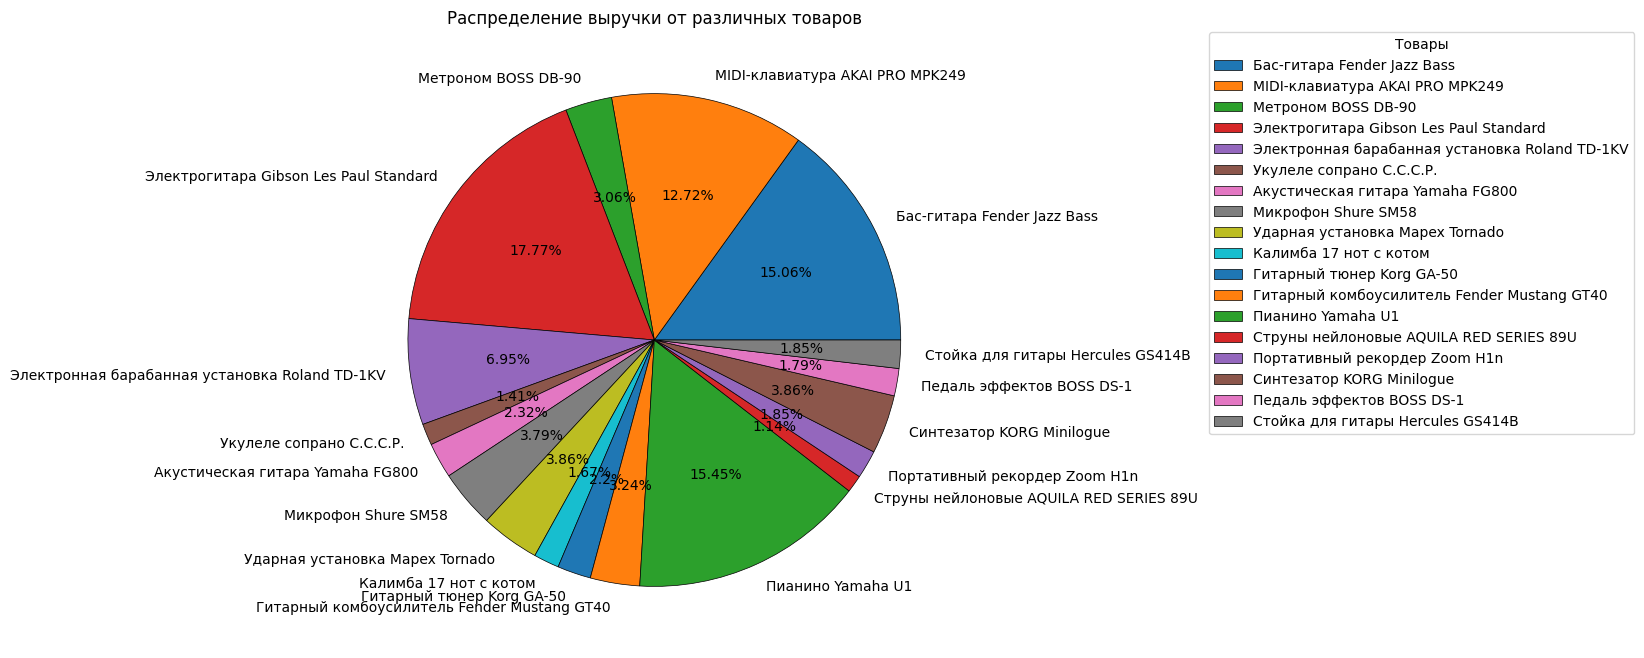

In [467]:
import matplotlib.pyplot as plt

def report():
    ti = total_income() # вся выручка магазина
    print('----------------ОТЧЁТ----------------')
    print(f"Общая выручка магазина: {ti}\n")
    data = {} # для графика
    max_title = ""
    out = [("Товары", "Кол-во продаж", "Доля в выручке")]
    for x in hash_goods.keys:
        if x is not None:
            max_title = max((max_title, x), key=lambda x: len(x))
            good = hash_goods.get(x)
            # hash_goods.get(x) -> категория, кол-во, цена, стоимость
            part = round(good[3] / ti * 100, 2) # доля товара в общей выручке
            data[x] = part
            out.append([x, str(good[1]), str(part) + '%'])
    for x in out:
        print(f"{x[0]}{' ' * (len(max_title) + 3 - len(x[0]))}{x[1]}{' ' * (17 - len(x[1]))}{x[2]}")
    fig = plt.figure(figsize=(15, 8))
    plt.title("Распределение выручки от различных товаров")
    wp = {'linewidth': 0.5, 'edgecolor': "black"} # для границ
    plt.pie(data.values(), labels=data.keys(), autopct=lambda x: str(round(x, 2)) + '%', wedgeprops=wp)
    plt.legend(data.keys(), title="Товары", bbox_to_anchor=(1.4, 1 ), loc='upper left', borderaxespad=0, ncol=1)
report()

## График продаж по дням

In [468]:
import random

def quick_sort(mas):
    low = []
    high = []
    same = []
    if len(mas) < 2:
        return mas
    anchor = mas[random.randint(0, len(mas) - 1)]
    for x in mas:
        if x < anchor:
            low += [x]
        elif x > anchor:
            high += [x]
        else:
            same += [x]
    return quick_sort(low) + same + quick_sort(high)


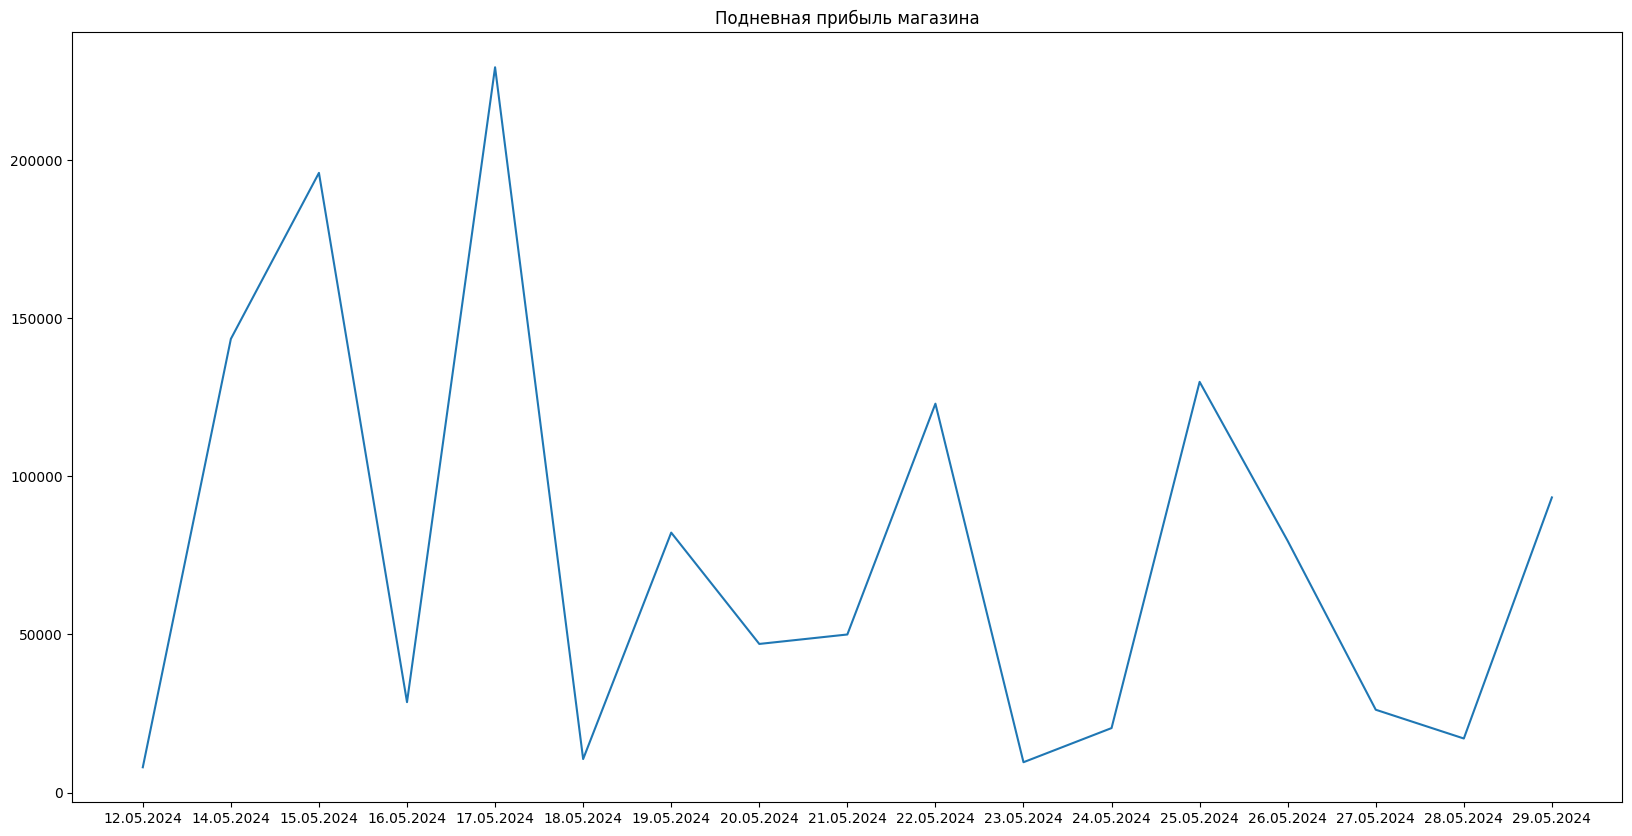

In [469]:
from datetime import datetime

def income_daily():
    data = {}
    for x in orders:
        td = datetime.strptime(x[1], "%d.%m.%Y")
        data[td] = data.get(td, 0) + x[6]
    data_label = list(data.keys())
    data_label = list(map(lambda x: x.strftime('%d.%m.%Y'), quick_sort(data_label)))
    data_value = [data[datetime.strptime(x, "%d.%m.%Y")] for x in data_label]
    fig = plt.figure(figsize=(20, 10))
    plt.title("Подневная прибыль магазина")
    plt.plot(data_label, data_value)

income_daily()